In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import os
import pandas as pd
import scipy.stats as stats
import gmaps
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

### Education levels vs Death Rate in USA by CDC

In [2]:
filename = 'datafiles/Education_Infant_Death_Records_2007_2016.csv'
filename_df = pd.read_csv(filename, encoding="ISO-8859-1")


In [3]:
education_sorted =filename_df.sort_values(["Death Rate"],ascending=False)

In [4]:
exclude_unknown = education_sorted.loc[education_sorted['Education']!= "Unknown/Not on certificate"]


In [5]:
del exclude_unknown['Deaths']
del exclude_unknown['Education Code']
del exclude_unknown['Births']
del exclude_unknown['Notes']
exclude_unknown

,Education,Death Rate
1,9th -12th grade,8.16
2,HS or GED,7.13
9,Excluded,6.63
0,8th grade or less,6.18
3,Some college credit,6.01
4,Associate degree,4.87
5,Bachelor's degree,3.73
6,Master's degree,3.35
7,Doctorate degree,3.12


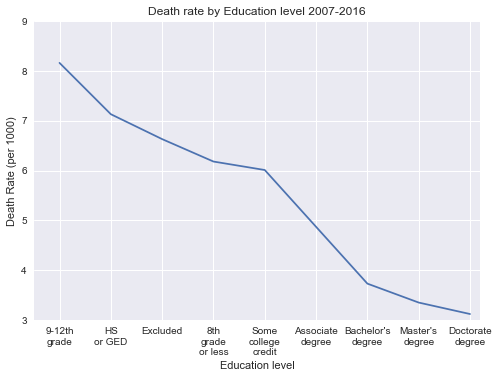

In [49]:
x_axis = exclude_unknown['Education']
y_axis = exclude_unknown['Death Rate']

# plt.plot(exclude_unknown["Education"],
#          exclude_unknown["Death Rate"]
         
#          )
plt.plot(x_axis, y_axis)


# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Death rate by Education level 2007-2016")
plt.ylabel("Death Rate (per 1000)")
plt.xlabel("Education level")
plt.grid(True)
plt.xticks((range(len(x_axis))), ["9-12th\ngrade", "HS\nor GED", "Excluded", "8th\ngrade\nor less", "Some\ncollege\ncredit", "Associate\ndegree",  "Bachelor's\ndegree", "Master's\ndegree", "Doctorate\ndegree"])
plt.xlim(-0.5, 8.2)
plt.ylim(3, 9)
# Save the figure
plt.savefig("Images/Education_lever_line.png")

# Show plot
plt.show()

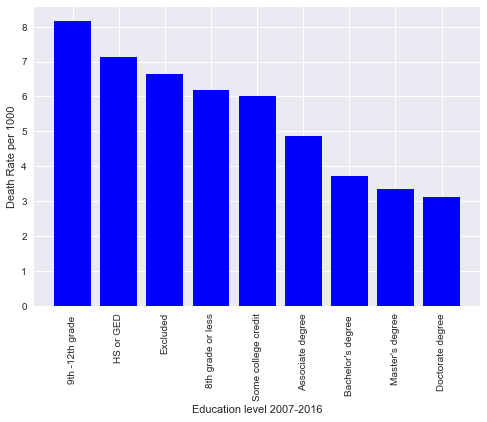

In [48]:
x_axis = exclude_unknown['Education']
y_axis = exclude_unknown['Death Rate']
plt.tight_layout()
plt.ylabel("Death Rate per 1000")
plt.xlabel("Education level 2007-2016")
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(exclude_unknown['Education'], rotation="vertical")

plt.savefig("Images/Education_level_barchart.png")
plt.show()

### Education level in USA by USDA

In [8]:
usdafilename = 'datafiles/Education_USDA.csv'
usdafilename_df = pd.read_csv(usdafilename, encoding="ISO-8859-1")

In [9]:
del usdafilename_df['Less than a high school diploma, 2013-17']
del usdafilename_df['High school diploma only, 2013-17']
del usdafilename_df["Some college or associate's degree, 2013-17"]
del usdafilename_df["Bachelor's degree or higher, 2013-17"]
del usdafilename_df["Unnamed: 11"]
        

In [10]:
usdafilename_df = usdafilename_df.dropna()
         

In [11]:
renamed_code = usdafilename_df.rename(columns={"FIPS Code":"GEOID"})
renamed_code['GEOID'] = renamed_code['GEOID'].map(lambda x: int(x))
renamed_code

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2
4,1009,AL,Blount County,20.2,32.3,34.4,13.1
5,1011,AL,Bullock County,28.6,36.6,21.4,13.4
6,1013,AL,Butler County,18.9,40.4,24.5,16.1
7,1015,AL,Calhoun County,16.8,32.2,33.1,17.9
8,1017,AL,Chambers County,19.1,38.4,29.1,13.3
9,1019,AL,Cherokee County,20.5,38.2,28.9,12.5


In [12]:
gazfilename = 'datafiles/2017_Gaz_counties_national.csv'
gazfilename_df = pd.read_csv(gazfilename, encoding="ISO-8859-1")

In [13]:
del gazfilename_df['USPS']
del gazfilename_df['ANSICODE']
del gazfilename_df["NAME"]
del gazfilename_df["ALAND"]
del gazfilename_df['AWATER']
del gazfilename_df['ALAND_SQMI']
del gazfilename_df["AWATER_SQMI"]
gazfilename_df.head()


,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [14]:
merge_table = pd.merge(renamed_code, gazfilename_df, on="GEOID")


In [15]:
merge_table.columns

Index(['GEOID', 'State', 'Area name',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       'Percent of adults completing some college or associate's degree, 2013-17',
       'Percent of adults with a bachelor's degree or higher, 2013-17',
       'INTPTLAT',
       'INTPTLONG                                                                                                               '],
      dtype='object')

In [16]:
merge_table.columns = ['GEOID', 'State', 'Area name',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       'Percent of adults completing some college or associate\'s degree, 2013-17',
       'Percent of adults with a bachelor\'s degree or higher, 2013-17',
       'INTPTLAT',
       'INTPTLONG']
merge_table.head()

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0,32.532237,-86.646440
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7,30.659218,-87.746067
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0,31.870253,-85.405104
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2,33.015893,-87.127148
4,1009,AL,Blount County,20.2,32.3,34.4,13.1,33.977358,-86.566440


In [17]:
def weighted_education(row):
    a = row['Percent of adults with less than a high school diploma, 2013-17']*0
    b = row['Percent of adults with a high school diploma only, 2013-17']*0.4
    c = row["Percent of adults completing some college or associate's degree, 2013-17"]*0.6
    d = row["Percent of adults with a bachelor's degree or higher, 2013-17"]*0.8
    return (a+b+c+d)

In [18]:
merge_table['Weighted Education Score'] = merge_table.apply(weighted_education, axis=1)

In [19]:
merge_table

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG,Weighted Education Score
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0,32.532237,-86.646440,50.90
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7,30.659218,-87.746067,54.70
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0,31.870253,-85.405104,39.10
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2,33.015893,-87.127148,43.12
4,1009,AL,Blount County,20.2,32.3,34.4,13.1,33.977358,-86.566440,44.04
5,1011,AL,Bullock County,28.6,36.6,21.4,13.4,32.101759,-85.717261,38.20
6,1013,AL,Butler County,18.9,40.4,24.5,16.1,31.751667,-86.681969,43.74
7,1015,AL,Calhoun County,16.8,32.2,33.1,17.9,33.771706,-85.822513,47.06
8,1017,AL,Chambers County,19.1,38.4,29.1,13.3,32.915504,-85.394032,43.46
9,1019,AL,Cherokee County,20.5,38.2,28.9,12.5,34.069515,-85.654242,42.62


In [38]:
# Store latitude and longitude in locations
locations = merge_table[["INTPTLAT", "INTPTLONG"]]
# Plot Heatmap
fig = gmaps.figure()
BD = merge_table["Weighted Education Score"]
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=BD , 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.5)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig


Figure(layout=FigureLayout(height='420px'))

### Education vs High IMR by counties

In [21]:
highcounties = 'datafiles/high_IMR_county.csv'
highcounties_df = pd.read_csv(highcounties, encoding="ISO-8859-1")
highcounties_df


,Unnamed: 0,index,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,0,115,"Caddo Parish, LA",22017,486,37838,12.84,2011.5,21.58,32.577195,-93.882423
1,1,116,"East Baton Rouge Parish, LA",22033,680,61916,10.98,2011.5,18.84,30.543930,-91.093131
2,2,153,"Hinds County, MS",28049,276,25226,10.94,2011.5,24.79,32.267788,-90.466017
3,3,127,"Baltimore city, MD",24510,976,90996,10.73,2011.5,22.42,39.300032,-76.610476
4,4,0,"Jefferson County, AL",1073,983,91579,10.73,2011.5,17.30,33.553444,-86.896536
5,5,264,"Shelby County, TN",47157,1482,140867,10.52,2011.5,20.83,35.183794,-89.895397
6,6,159,"St. Louis city, MO",29510,482,48971,9.84,2011.5,26.30,38.635699,-90.244582
7,7,216,"Hamilton County, OH",39061,1087,111518,9.75,2011.5,16.75,39.196927,-84.544187
8,8,146,"Wayne County, MI",26163,2337,241580,9.67,2011.5,23.87,42.284664,-83.261953
9,9,205,"Cumberland County, NC",37051,548,57261,9.57,2011.5,17.75,35.050192,-78.828719


In [39]:
coordinates3 = [
    (32.577195, -93.882423),
    (30.543930, -91.093131),
    (32.267788, -90.466017),
    (39.300032, -76.610476),
    (33.553444, -86.896536),
    (35.183794, -89.895397),
    (38.635699, -90.244582),
    (39.196927, -84.544187),
    (42.284664, -83.261953),
    (35.050192, -78.828719)
]

In [40]:
figure_layout3 = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig3 = gmaps.figure(layout=figure_layout3)

In [41]:
# Assign the marker layer to a variable
markers3 = gmaps.marker_layer(coordinates3)
# Add the layer to the map
fig.add_layer(markers3)
#fig

In [42]:
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(markers3)

fig

Figure(layout=FigureLayout(height='420px'))

### Education vs Low IMR by counties

In [26]:
lowcounties = 'datafiles/low_IMR_county.csv'
lowcounties_df = pd.read_csv(lowcounties, encoding="ISO-8859-1")
lowcounties_df


,Unnamed: 0,index,County,County ID,Deaths,Births,Death Rate,Year,All Ages in Poverty Percent,Lat,Lng
0,0,17,"Marin County, CA",6041,15,6941,2.16,2011.5,8.11,38.051817,-122.745974
1,1,182,"Ocean County, NJ",34029,251,81920,3.06,2011.5,10.28,39.865669,-74.258864
2,2,29,"San Mateo County, CA",6081,284,92468,3.07,2011.5,7.39,37.414672,-122.371546
3,3,43,"Douglas County, CO",8035,32,10337,3.10,2011.5,3.50,39.325414,-104.925987
4,4,172,"Bergen County, NJ",34003,296,94635,3.13,2011.5,6.90,40.959698,-74.074727
5,5,181,"Morris County, NJ",34027,158,48520,3.26,2011.5,4.79,40.858896,-74.547292
6,6,31,"Santa Clara County, CA",6085,817,244811,3.34,2011.5,9.37,37.220777,-121.690622
7,7,26,"San Francisco County, CA",6075,307,89691,3.42,2011.5,12.35,37.727239,-123.032229
8,8,184,"Somerset County, NJ",34035,121,35023,3.45,2011.5,4.92,40.565527,-74.619938
9,9,180,"Monmouth County, NJ",34025,219,63527,3.45,2011.5,7.05,40.287048,-74.152446


In [43]:
coordinates4 = [
    (38.051817, -122.745974),
    (39.865669, -74.258864),
    (37.414672, -122.371546),
    (39.325414, -104.925987),
    (40.959698, -74.074727),
    (40.858896, -74.547292),
    (37.220777, -121.690622),
    (37.727239, -123.032229),
    (40.565527, -74.619938),
    (40.287048, -74.152446)
]

In [44]:
figure_layout4 = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig4 = gmaps.figure(layout=figure_layout4)

In [45]:
# Assign the marker layer to a variable
markers4 = gmaps.marker_layer(coordinates4)
# Add the layer to the map
fig.add_layer(markers4)
#fig

In [46]:
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(markers4)

fig

Figure(layout=FigureLayout(height='420px'))

### AAR Education vs Death Rate

In [31]:
aareducation = 'datafiles/Death_Rate_by_AAR_by_Education.csv'
aareducation_df = pd.read_csv(aareducation, encoding="ISO-8859-1")

In [32]:
aareducation_sorted =aareducation_df.sort_values(["Death Rate"],ascending=False)


In [33]:
exclude_unknown_aar = aareducation_sorted.loc[aareducation_sorted['Education']!= "Unknown/Not on certificate"]
exclude_unknown_aar



,Race,Race Code,Education,Death Rate
1,Black or African American,2054-5,9th through 12th grade with no diploma,12.59
9,Black or African American,2054-5,Excluded,12.10
2,Black or African American,2054-5,High school graduate or GED completed,11.62
3,Black or African American,2054-5,"Some college credit, but not a degree",10.28
4,Black or African American,2054-5,"Associate degree (AA, AS)",9.80
0,Black or African American,2054-5,8th grade or less,9.04
5,Black or African American,2054-5,"Bachelor's degree (BA, AB, BS)",8.18
6,Black or African American,2054-5,"Master's degree (MA, MS)",7.86
7,Black or African American,2054-5,"Doctorate (PHD, EdD) or Professional Degree (M...",6.20


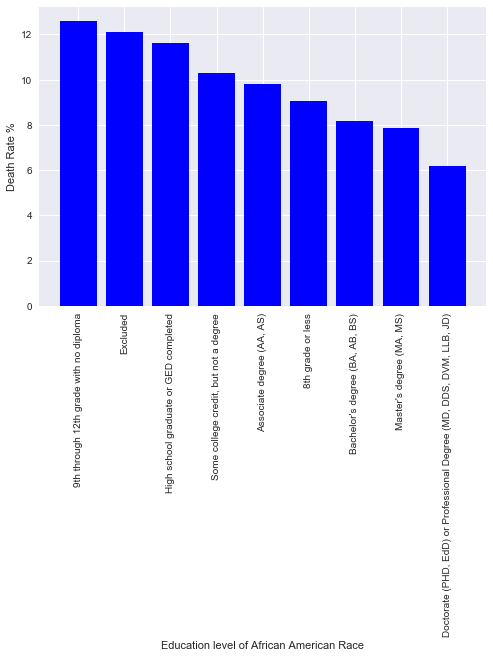

In [34]:
x_axis = exclude_unknown_aar['Education']
y_axis = exclude_unknown_aar['Death Rate']
plt.tight_layout()
plt.ylabel("Death Rate %")
plt.xlabel("Education level of African American Race")
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(exclude_unknown_aar['Education'], rotation="vertical")

plt.savefig("Images/Education_of_AAR.png")
plt.show()

In [35]:
censusaareducation = 'datafiles/AAR_Education_2013_2017.csv'
censusaareducation_df = pd.read_csv(censusaareducation, encoding="ISO-8859-1")


In [36]:
censusaareducation_df.dropna()

,Education,2013,2014,2015,2016,2017,total,2013%,2014%,2015%,2016%,2017%,Average
0,8th grade or less,921,889,778,907,773,4268,3.183767,3.020830,2.592556,2.978165,2.516194,2.858302
1,9th through 12th grade with no diploma,3570,3439,3308,3293,3241,16851,12.340985,11.685752,11.023360,10.812674,10.549787,11.282512
2,High school graduate or GED completed,"9,696","9,993","10,268","10,319","10,249","50,525",33.517699,33.956302,34.216402,33.882778,33.361544,33.786945
3,"Some college credit, but not a degree","6,658","6,639","6,899","6,942","6,857","33,995",23.015763,22.559380,22.989770,22.794287,22.320237,22.735887
4,"Associate degree (AA, AS)","2,551",2720,2758,"2,695",2937,13661,8.818446,9.242584,9.190576,8.849122,9.560236,9.132193
5,"Bachelor's degree (BA, AB, BS)","3,657","3,835","3,901","4,074","4,301","19,768",12.641731,13.031364,12.999434,13.377114,14.000195,13.209967
6,"Master's degree (MA, MS)","1,506","1,529","1,689","1,789","1,872","8,385",5.206029,5.195555,5.628312,5.874241,6.093552,5.599538
7,"Doctorate (PHD, EdD) or Professional Degree (M...",369,385,408,436,491,"2,089",1.275581,1.308233,1.359592,1.431620,1.598255,1.394656


### Level of Education of African Americans 2013-2017

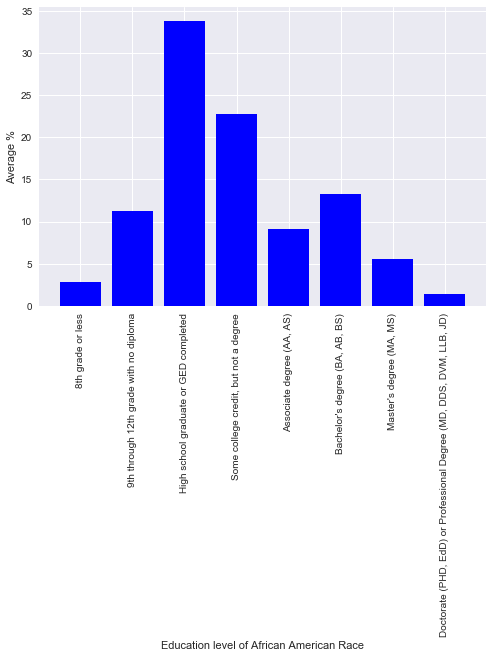

In [37]:
x_axis = censusaareducation_df['Education']
y_axis = censusaareducation_df['Average']
plt.tight_layout()
plt.ylabel("Average %")
plt.xlabel("Education level of African American Race")
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(censusaareducation_df['Education'], rotation="vertical")

plt.savefig("Images/Census_Education_of_AAR.png")
plt.show()